# Regresión lineal multivariable: Descenso de gradiente
M2U2 - Ejercicio 2

## ¿Qué vamos a hacer?
- Implementar la optimización de la función de coste por gradient descent, o lo que es lo mismo, entrenar el modelo

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Instrucciones

Este ejercicio es una continuación del ejercicio anterior "Función de coste", por lo que debes basarte en el mismo.

In [1]:
import time
import numpy as np

from matplotlib import pyplot as plt

## Tarea 1: Implementar la función de coste para regresión lineal multivariable

En esta tarea, debes copiar la celda correspondiente del ejercicio anterior, trayendo tu código para implementar la función de coste vectorizada:

In [2]:
# TODO: Implementa la función de coste vectorizada siguiendo la siguiente plantilla

def cost_function(x, y, theta):
    """Computa la función de coste de manera vectorizada.

    Argumentos:
    x -- array 2D de Numpy, tamaño m x n
    y -- array 1D de Numpy, tamaño m
    theta -- array 1D de Numpy, tamaño n

    Devuelve:
    j -- float con el coste para theta
    """
    # número de ejemplos
    m = x.shape[0]

    # asegurar que theta sea un vector columna (n x 1) para multiplicación matricial
    theta = theta.reshape(-1, 1)  # ahora es n x 1

    # predecir todas las Y usando multiplicación matricial
    h = np.matmul(x, theta)

    # convertir y en vector columna si es necesario
    y = y.reshape(-1, 1)  # m x 1

    # calcular residuos (diferencia entre predicción y valores reales)
    residuos = h - y  # m x 1

    # elevar al cuadrado y sumar todos los residuos
    suma_cuadrados = np.sum(residuos**2)

    # coste final según la fórmula J(theta) = 1/(2*m) * sum((h-y)^2)
    j = suma_cuadrados / (2*m)

    # asegurar que devuelva float y no array 2D
    return float(j)

## Tarea 2: Implementar la optimización de dicha función de coste por gradient descent

Ahora vamos a resolver la optimización de dicha función de coste para entrenar el modelo, mediante el método de gradient descent de forma vectorizada. El modelo se considerará entrenado cuando su función de coste haya alcanzado un valor mínimo y estable.

$$Y = h_\Theta(X) = X \times \Theta^T$$

$$J_\theta = \frac{1}{2m} \sum_{i = 0}^{m} (h_\theta(x^i) - y^i)^2$$

$$\theta_j := \theta_j - \alpha [\frac{1}{m} \sum_{i = 0}^{m}{(h_\theta(x^i) - y^i) x_j^i}]$$

Para ello, de nuevo, rellena la plantilla de código de la siguiente celda.

Consejos:
- Si lo prefieres, puedes implementar primero la función con bucles e iteraciones y por último de forma vectorizada
- Recuerda las dimensiones de cada vector/matriz
- De nuevo, anota las operaciones por orden paso a paso en una hoja o celda auxiliar
- En cada paso, anota las dimensiones de su resultado, que también puedes comprobar en tu código
- Usa numpy.matmul() como multiplicación de matrices
- Al inicio de cada iteración de entrenamiento, debes copiar toda $\Theta$, puesto que vas a iterar actualizando cada uno de sus valores basándote en el vector completo

In [3]:
# TODO: Implementa la función que entrena el modelo por gradient descent
def gradient_descent(x, y, theta, alpha, e=1e-6, iter_=1000):
    """ Entrena el modelo optimizando su función de coste por gradient descent

    Argumentos posicionales:
    x -- array 2D de Numpy con los valores de las variables independientes de los ejemplos, de tamaño m x n
    y -- array 1D de Numpy con la variable dependiente/objetivo, de tamaño m x 1
    theta -- array 1D de Numpy con los pesos de los coeficientes del modelo, de tamaño 1 x n (vector fila)
    alpha -- float, ratio de entrenamiento

    Argumentos nombrados (keyword):
    e -- float, diferencia mínima entre iteraciones para declarar que el entrenamiento ha convergido finalmente
    iter_ -- int/float, nº de iteraciones

    Devuelve:
    j_hist -- list/array con la evolución de la función de coste durante el entrenamiento
    theta -- array de Numpy con el valor de theta en la última iteración
    """

    iter_ = int(iter_)    # Si has declarado iter_ en notación científica (1e3) o float (1000.), conviértelo

    # Inicializa j_hist como una list o un array de Numpy. Recuerda que no sabemos qué tamaño tendrá finalmente
    # Su nº máx. de elementos será el nº máx. de iteraciones
    j_hist = []

    m, n = x.shape    # Obtén m y n a partir de las dimensiones de X

    for k in range(iter_):    # Itera sobre el nº de iteraciones máximo
        theta_iter = theta.copy()    # Copia con "deep copy" la theta para cada iteración, ya que debemos actualizarla

        for j in range(n):    # Itera sobre el nº de características
            # Actualiza theta_iter para cada característica, según la derivada de la función de coste
            # Incluye el ratio de entrenamiento alpha
            # Cuidado con las multiplicaciones matriciales, su órden y dimensiones
            h = np.matmul(x, theta)
            grad = (1/m) * np.sum((h - y) * x[:, j])
            theta_iter[j] = theta[j] - alpha * grad

        theta = theta_iter    # Actualiza toda la theta, lista para la siguiente iteración

        cost = cost_function(x, y, theta)    # Calcula el coste para la iteración de theta actual

        j_hist.append(cost)    # Añade el coste de la iteración actual al histórico de costes

        # Comprueba si la diferencia entre el coste de la iteración actual y el de la última iteración en valor
        # absoluto son menores que la diferencia mínima para declarar convergencia, e, para toda iteración
        # excepto la primera
        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print('Converge en la iteración nº: ', k)
            break
    else:
        print('Nº máx. de iteraciones alcanzado')

    return j_hist, theta


## Tarea 3: Comprobar la implementación del gradient descent

Para comprobar tu implementación, de nuevo, utiliza la misma celda variando sus parámetros varias veces, representando gráficamente la evolución de la función de coste y viendo cómo su valor va acercándose a 0.

En cada caso, comprueba que la $\Theta$ inicial y final son muy similares en los siguientes escenarios:
1. Genera varios datasets sintéticos, comprobando cada uno
1. Modifica el nº de ejemplos y características, m y n
1. Modifica el parámetro de error, lo que puede hacer que la $\Theta$ inicial y final no concuerden del todo, y a mayor error más diferencia puede haber
1. Comprueba los hiper-parámetros del nº máx. de iteraciones o el ratio de entrenamiento $\alpha$, que hará que el modelo tarde más o menos en entrenarse, dentro de unos valores mínimos y máximos

In [4]:
# TODO: Genera un dataset sintético, con término de error, de la forma que escojas, con Numpy o Scikit-learn

from sklearn.datasets import make_regression

X, Y, Theta_verd  = make_regression(n_samples= 200, n_features= 10, coef= True, noise = 0.3)

# Comprueba los valores y dimensiones (forma o "shape") de los vectores
print('Theta real a estimar:')
print(Theta_verd)
print()

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10,:5])
print(Y[:10])

print('Dimensiones de X e Y:')

print('X.shape:', X.shape)
print('Y.shape:', Y.shape)

Theta real a estimar:
[18.87696118 61.06732979 65.00367703 75.51453848 96.06486135 30.75804738
 43.40811978 92.72552454 62.01546472 70.8206831 ]

Primeras 10 filas y 5 columnas de X e Y:
[[-0.84879859 -1.58280764 -1.5240836  -0.12520737 -0.35800497]
 [ 0.872121   -0.72379875  0.25264007 -0.70531292 -0.80093529]
 [-1.03602146  1.7573382   0.13141257  1.78826537  0.3510147 ]
 [-0.29932694 -0.41808067 -1.27706253  1.4832859   0.21246256]
 [ 1.86523092 -0.9902393  -0.77738651 -0.97819186 -0.7541333 ]
 [ 0.27420494 -0.12129866 -1.05014869  0.36149499 -0.40975642]
 [ 0.1423007   1.81386177  0.30562626  0.84810736  2.36584638]
 [ 0.66433212  0.4220267  -0.83558343  1.03955701 -0.05137706]
 [-0.18101318  1.6367429  -0.46137693  0.45715174 -1.9535879 ]
 [ 0.02613972 -0.72110912 -1.42730748  0.59077619  0.4277389 ]]
[-255.56839718 -198.80578167  147.86087671  183.82088974  -14.05342709
   33.62433413  366.91663802 -156.57582535   59.08075603 -285.69218775]
Dimensiones de X e Y:
X.shape: (200, 10

In [5]:
# TODO: Comprueba tu implementación entrenando un modelo sobre el dataset sintético creado previamente

# Utiliza una theta iniciada aleatoriamente o la Theta_verd, en función del escenario a comprobar
theta_ini = np.random.randn(X.shape[1])  # inicialización aleatoria

print('Theta inicial:')
print(theta_ini)

alpha = 1e-1
e = 1e-3
iter_ = 1e3    # Comprueba que tu función puede admitir valores float

print('Hiper-parámetros usados:')
print('Alpha:', alpha, 'Error máx.:', e, 'Nº iter:', iter_)

t = time.time()
j_hist, theta_final = gradient_descent(X, Y, theta_ini, alpha, e=e, iter_=iter_)
print('Tiempo de entrenamiento (s):', time.time() - t)

# Últimos valores de la función de coste
print('\nÚltimos 10 valores de la función de coste')
print(j_hist[-10:])

print('\nCoste final:')
print(j_hist[-1])

print('\nTheta final:')
print(theta_final)

print('Valores verdaderos de Theta y diferencia con valores entrenados:')
print(Theta_verd)
print(theta_final - Theta_verd)

Theta inicial:
[-0.73097342 -0.69133578 -1.01139389 -2.12294175 -1.30943751 -0.62305311
  0.62119453 -0.97102469 -0.13883177 -0.03260759]
Hiper-parámetros usados:
Alpha: 0.1 Error máx.: 0.001 Nº iter: 1000.0
Converge en la iteración nº:  103
Tiempo de entrenamiento (s): 0.022691726684570312

Últimos 10 valores de la función de coste
[0.06308354817503448, 0.060558629323837376, 0.05834306995761415, 0.056398828802438565, 0.05469256084541024, 0.05319503505152437, 0.051880624633272726, 0.05072686078074711, 0.04971404190735132, 0.048824891467544894]

Coste final:
0.048824891467544894

Theta final:
[18.9155356  61.0461575  64.9276312  75.50309444 96.01350734 30.75017955
 43.39657185 92.62675855 61.99187009 70.82594168]
Valores verdaderos de Theta y diferencia con valores entrenados:
[18.87696118 61.06732979 65.00367703 75.51453848 96.06486135 30.75804738
 43.40811978 92.72552454 62.01546472 70.8206831 ]
[ 0.03857442 -0.02117229 -0.07604583 -0.01144403 -0.05135402 -0.00786783
 -0.01154793 -0.0

Representa gráficamente el histórico de la función de coste para comprobar tu implementación:

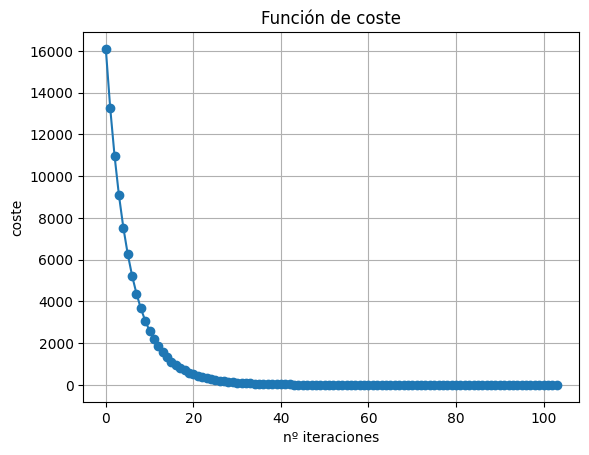

In [6]:
# TODO: Representa gráficamente la función de coste vs el nº de iteraciones

plt.title('Función de coste')
plt.xlabel('nº iteraciones')
plt.ylabel('coste')

plt.plot(range(len(j_hist)), j_hist, marker='o', linestyle='-')

plt.grid()
plt.show()